In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import SimpleRNN, Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Implementing a Basic RNN Model

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
data = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

data.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


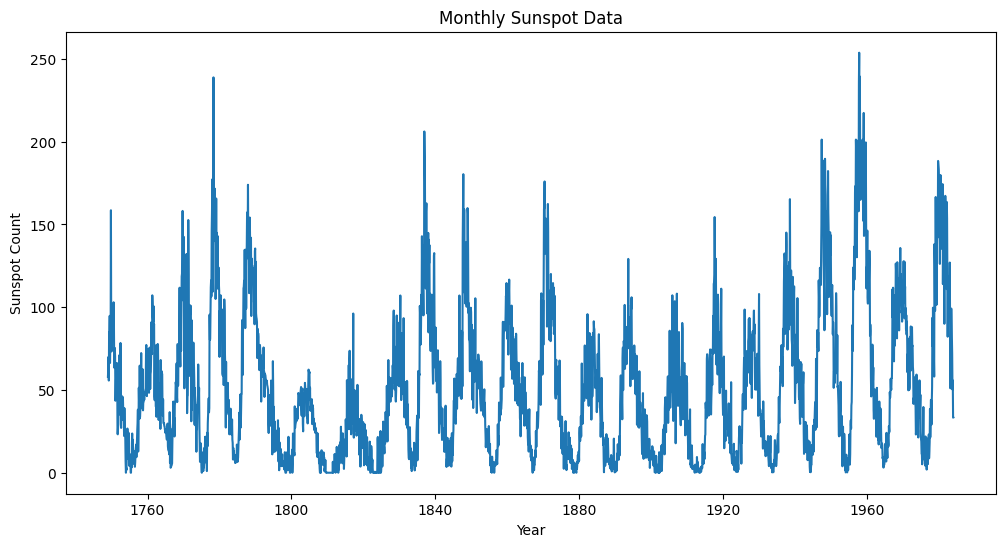

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title("Monthly Sunspot Data")
plt.xlabel("Year")
plt.ylabel("Sunspot Count")
plt.show()


In [4]:
sunspot_values = data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(sunspot_values)

In [5]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

In [6]:
n_steps = 12
X, y = create_sequences(scaled_data, n_steps)

In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 0.0056
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - val_loss: 0.0059
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036 - val_loss: 0.0054
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 0.0059
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033 - val_loss: 0.0058
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034 - val_

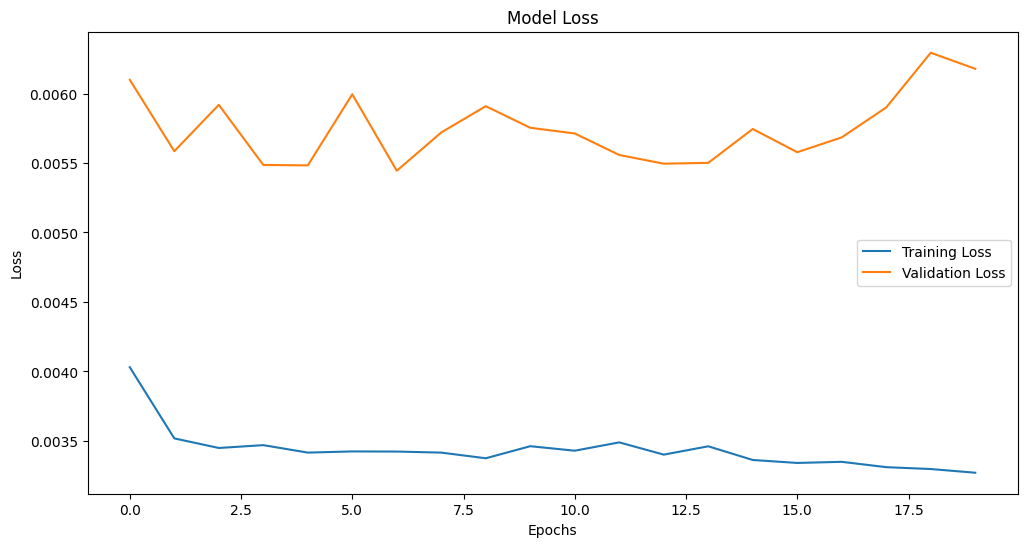

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(X_test)

# Inverse scale the predictions and the actual values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


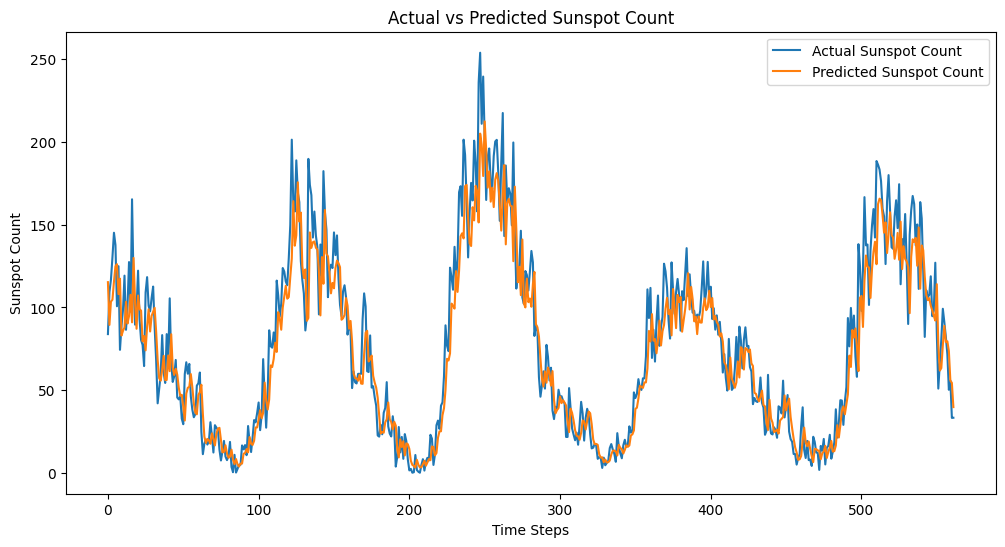

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Sunspot Count')
plt.plot(y_pred_rescaled, label='Predicted Sunspot Count')
plt.title('Actual vs Predicted Sunspot Count')
plt.xlabel('Time Steps')
plt.ylabel('Sunspot Count')
plt.legend()
plt.show()

# Stacking RNN Layers and Bi-directional RNNs

In [15]:
# Stacked model
model_stacked = Sequential()
model_stacked.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model_stacked.add(SimpleRNN(50, activation='relu'))  # Second RNN layer
model_stacked.add(Dense(1))
model_stacked.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history_stacked = model_stacked.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Stacked RNN Model
loss_stacked = model_stacked.evaluate(X_test, y_test)
print(f'Stacked RNN Test Loss: {loss_stacked:.4f}')

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0197 - val_loss: 0.0061
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 0.0056
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - val_loss: 0.0056
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - val_loss: 0.0063
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - val_loss: 0.0055
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0033 - val_loss: 0.0056
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0033 - va

In [17]:
from tensorflow.keras.layers import Bidirectional

# Bi-Directional RNN Model
model_bidirectional = Sequential()
model_bidirectional.add(Bidirectional(SimpleRNN(50, activation='relu'), input_shape=(n_steps, 1)))
model_bidirectional.add(Dense(1))
model_bidirectional.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
history_bidirectional = model_bidirectional.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - val_loss: 0.0059
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0033 - val_loss: 0.0054
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - val_loss: 0.0060
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - va

In [19]:
loss_bidirectional = model_bidirectional.evaluate(X_test, y_test)
print(f'Bi-Directional RNN Test Loss: {loss_bidirectional:.4f}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056
Bi-Directional RNN Test Loss: 0.0054


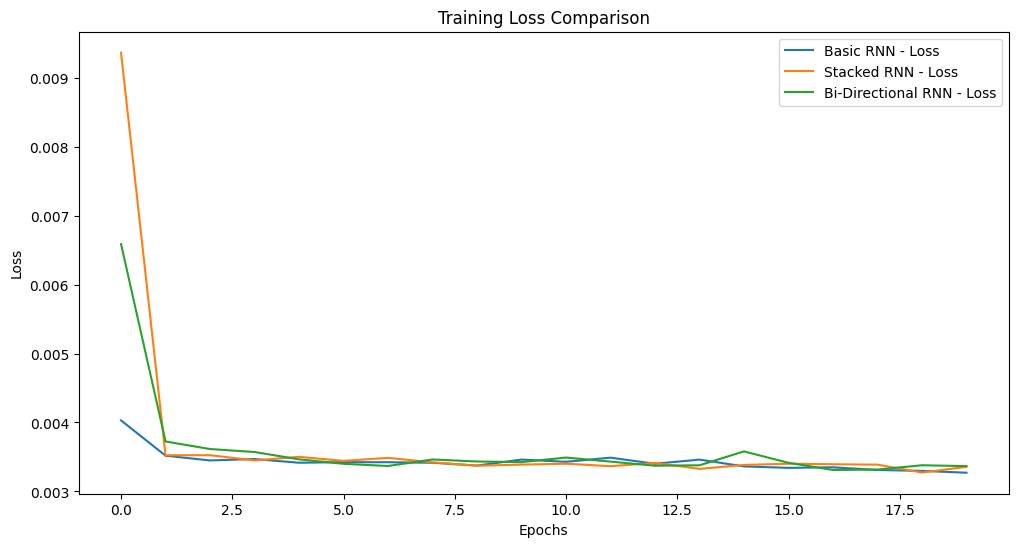

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Basic RNN - Loss')
plt.plot(history_stacked.history['loss'], label='Stacked RNN - Loss')
plt.plot(history_bidirectional.history['loss'], label='Bi-Directional RNN - Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

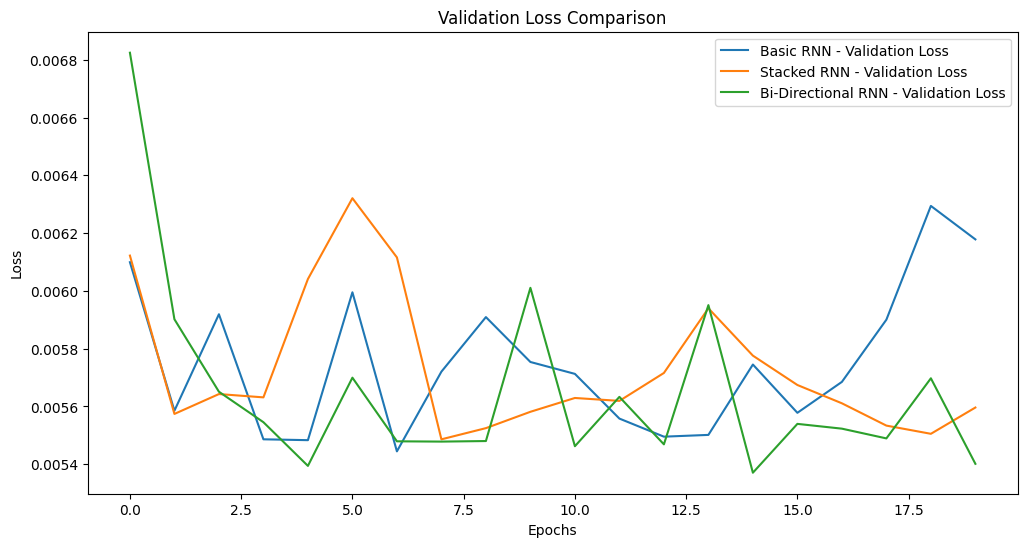

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Basic RNN - Validation Loss')
plt.plot(history_stacked.history['val_loss'], label='Stacked RNN - Validation Loss')
plt.plot(history_bidirectional.history['val_loss'], label='Bi-Directional RNN - Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exploring Hybrid Architectures

In [24]:
model_hybrid = Sequential()

# CNN Layers
model_hybrid.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, 1)))
model_hybrid.add(MaxPooling1D(pool_size=2))
model_hybrid.add(Dropout(0.2))
model_hybrid.add(Flatten())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# RNN Layer
model_hybrid.add(Dense(50, activation='relu'))
model_hybrid.add(Dense(1))

In [26]:
model_hybrid.compile(optimizer='adam', loss='mse')

# Train the Hybrid Model
history_hybrid = model_hybrid.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0187 - val_loss: 0.0087
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0077
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0068
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046 - val_loss: 0.0068
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - val_loss: 0.0071
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0038 - val_loss: 0.0061
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0060
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_loss: 0.0063
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0071
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0071
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - val_loss: 0.0066
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - val_lo

In [27]:
loss_hybrid = model_hybrid.evaluate(X_test, y_test)
print(f'Hybrid RNN-CNN Test Loss: {loss_hybrid:.4f}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 
Hybrid RNN-CNN Test Loss: 0.0058


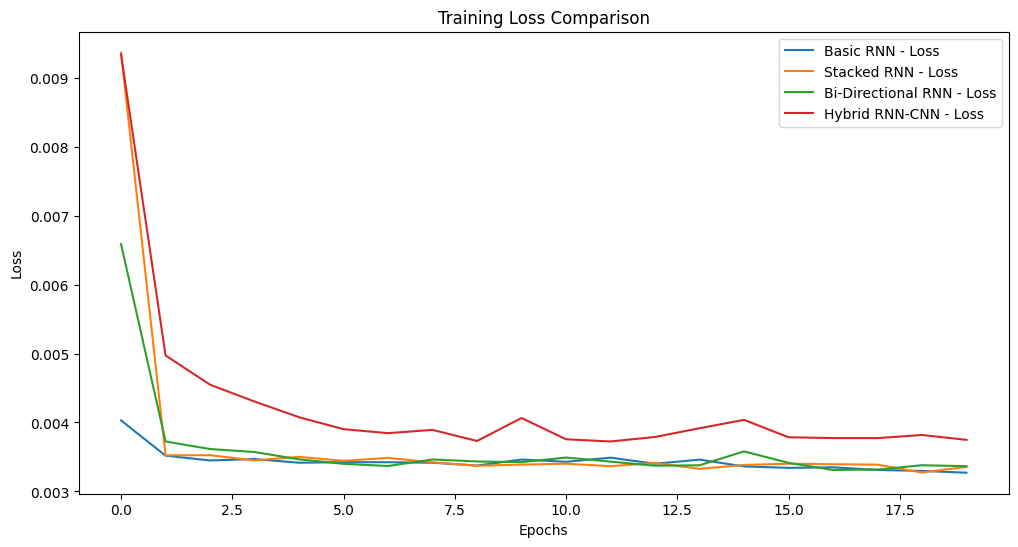

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Basic RNN - Loss')
plt.plot(history_stacked.history['loss'], label='Stacked RNN - Loss')
plt.plot(history_bidirectional.history['loss'], label='Bi-Directional RNN - Loss')
plt.plot(history_hybrid.history['loss'], label='Hybrid RNN-CNN - Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

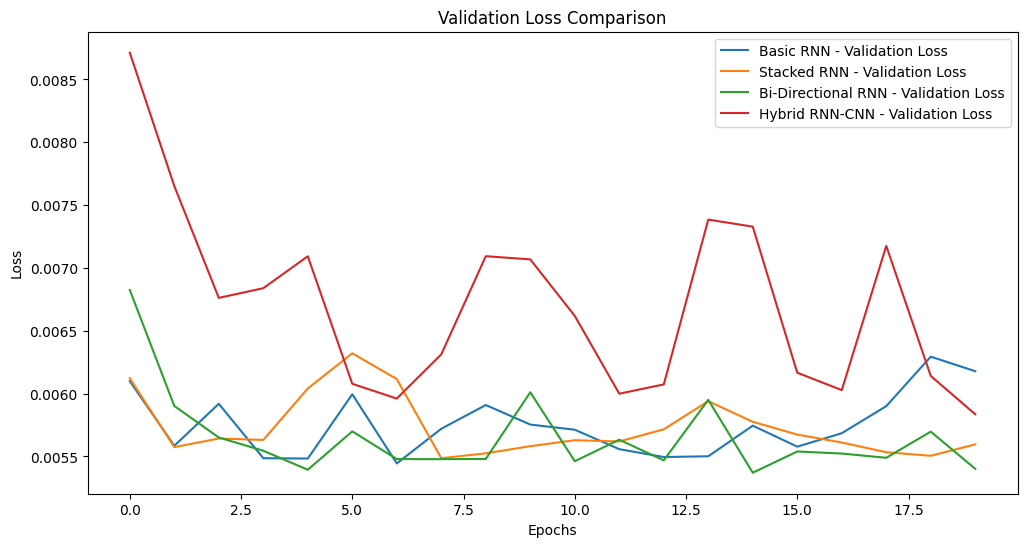

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Basic RNN - Validation Loss')
plt.plot(history_stacked.history['val_loss'], label='Stacked RNN - Validation Loss')
plt.plot(history_bidirectional.history['val_loss'], label='Bi-Directional RNN - Validation Loss')
plt.plot(history_hybrid.history['val_loss'], label='Hybrid RNN-CNN - Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()